In [517]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import json

from sklearn import preprocessing

In [518]:
def parseData(row):
    return datetime.strptime(row['Data'], "%Y-%m-%d")

Célula abaixo faz todos os cálculos detalhados abaixo da chamada da célula seguinte para executar direto ao ponto

In [547]:
def getCity(city):
    dataframe = cities[cities['City'] == city]
    dataframe = dataframe[['16-06', '22-06', '29-06', '06-07', '13-07', '20-07', '10-08', '18-08', '24-08', '01-09', '07-09', '15-09', '21-09']]
    return dataframe.sum()

def groupCovid(df, start, end):
    #agrupa casos por semana
    df = df.sort_values(by="Data")
    df = df[(df['Data'] >= start) & (df['Data'] <= end)]
    
    groupedByWeek = df.groupby(df['Data'].dt.strftime('%W'))['casos']
    
    return groupedByWeek.sum()

def analyzeCity(cityAnalyzed, weeksAfter):
    covid = pd.read_csv('./data/casos/covid-cases.csv')

    #remover colunas unamed
    covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    covid['Data'] = covid.apply (lambda row: parseData(row), axis=1)
    df = covid[covid['cidade'] == cityAnalyzed]
    cities = pd.read_csv('./data/distribuicao-tweets/distribuitionWithCity.csv')

    tweetsNormalizados = getCity(cityAnalyzed)

    #normaliza dados
    tweetsNormalizados=(tweetsNormalizados-tweetsNormalizados.min())/(tweetsNormalizados.max()-tweetsNormalizados.min())
    covidDataByWeek = groupCovid(df, "2020-06-30", "2020-09-21")

    #normaliza dados
    covidDataByWeek=(covidDataByWeek-covidDataByWeek.min())/(covidDataByWeek.max()-covidDataByWeek.min())
    dfTweets = pd.DataFrame({'data':tweetsNormalizados.index, 'tweets na semana':tweetsNormalizados.values})
    dfTweets["id"] = dfTweets.index #compara com casos X semanas seguintes

    dfCasos = pd.DataFrame({'semana':covidDataByWeek.index, 'casos de covid na semana':covidDataByWeek.values})
    dfCasos["id"] = dfCasos.index + weeksAfter
    
    dadosAgrupados = pd.concat([dfTweets])
    dadosAgrupados = pd.merge(dadosAgrupados, dfCasos, on='id')
    dadosAgrupados = dadosAgrupados[['data', 'semana', 'tweets na semana', 'casos de covid na semana']]

    print(dadosAgrupados.corr())

    dadosAgrupados.plot(kind="line")
    plt.show()

                          tweets na semana  casos de covid na semana
tweets na semana                  1.000000                  0.240452
casos de covid na semana          0.240452                  1.000000


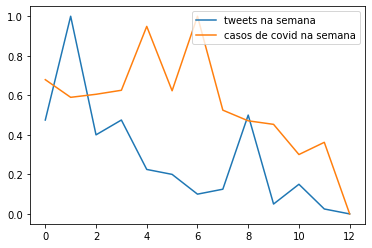

                          tweets na semana  casos de covid na semana
tweets na semana                  1.000000                  0.207998
casos de covid na semana          0.207998                  1.000000


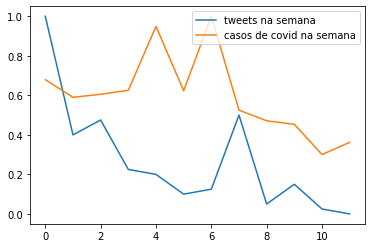

                          tweets na semana  casos de covid na semana
tweets na semana                  1.000000                  0.545929
casos de covid na semana          0.545929                  1.000000


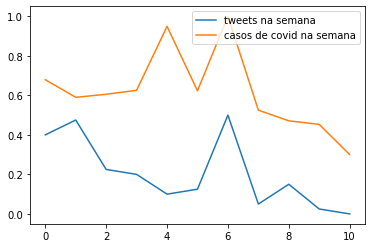

                          tweets na semana  casos de covid na semana
tweets na semana                  1.000000                  0.011104
casos de covid na semana          0.011104                  1.000000


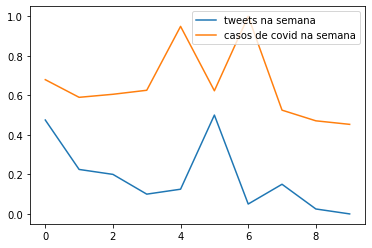

                          tweets na semana  casos de covid na semana
tweets na semana                  1.000000                  0.692619
casos de covid na semana          0.692619                  1.000000


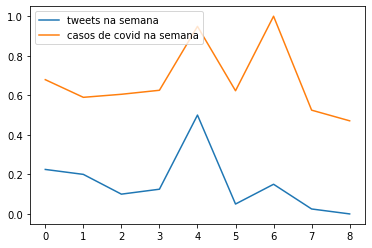

In [561]:
cityAnalyzed = ["São Paulo"]
weeksAfter = [0, 1, 2, 3, 4]

for city in cityAnalyzed:
    for weeks in weeksAfter:
        analyzeCity(city, weeks)

# Melhores resultados - análise manual

## Analizando tweets depois das semanas

---

- São Paulo - tweets de 3 semanas depois refletem os casos dessa semana com 0.747133 corr
- Rio de Janeiro - tweets de 4 semanas depois refletem os casos dessa semana com 0.332881 corr
- Belo Horizonte - tweets de 1 semana depois refletem os casos dessa semana com 0.649819 corr
- Fortaleza - tweets de 2 semanas depois refletem os casos dessa semana com 0.493213 corr
- Porto Alegre - tweets de 4 semanas depois refletem os casos dessa semana com -0.605307 corr
- Recife - tweets de 3 semanas depois refletem os casos dessa semana com -0.516005 corr
- Manaus - tweets de 4 semanas depois refletem os casos dessa semana com 0.497384 corr
- Salvador - não houve boa correlação em nenhum dos períodos

## Analizando semanas depois dos tweets

---

- São Paulo - casos de 4 semanas depois refletem os tweets dessa semana com 0.692619 corr
- Rio de Janeiro - casos de 4 semanas depois refletem os tweets dessa semana com -0.604875 corr
- Belo Horizonte - casos de 1 semana depois refletem os tweets dessa semana com 0.61064 corr
- Fortaleza - casos de 2 semanas depois refletem os tweets dessa semana com 0.631897 corr
- Porto Alegre - casos de 3 semanas depois refletem os tweets dessa semana com -0.617216 corr
- Recife - casos de 3 semanas depois refletem os tweets dessa semana com 0.579416 corr
- Manaus - casos de 4 semanas depois refletem os tweets dessa semana com -0.408583 corr
- Salvador - casos de 2 semanas depois refletem os tweets dessa semana com -0.326249 corr


In [521]:
covid = pd.read_csv('./data/casos/covid-cases.csv')

#remover colunas unamed
covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

covid['Data'] = covid.apply (lambda row: parseData(row), axis=1)

covid.head(10)

,cidade,Data,casos
0,São Paulo,2020-02-25,1
1,São Paulo,2020-02-26,0
2,São Paulo,2020-02-27,0
3,São Paulo,2020-02-28,1
4,São Paulo,2020-02-29,0
5,São Paulo,2020-03-01,0
6,São Paulo,2020-03-02,0
7,São Paulo,2020-03-03,0
8,São Paulo,2020-03-04,1
9,São Paulo,2020-03-05,3


In [522]:
def cityToAnalyze(city):
    return covid[covid['cidade'] == city]

df = cityToAnalyze(cityAnalyzed)

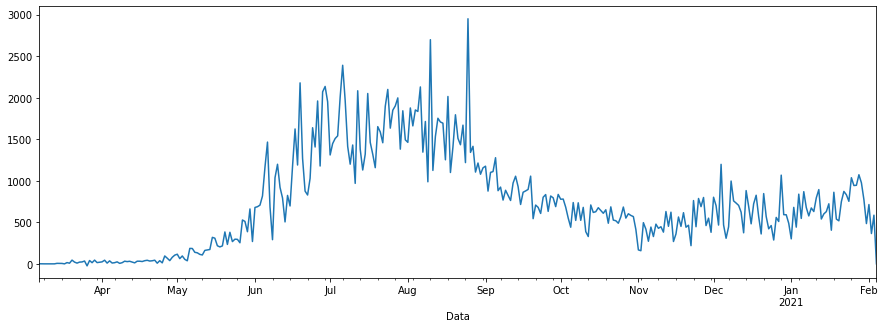

In [523]:
df.groupby('Data', sort=False)['casos'].sum().plot(kind="line", figsize=(15, 5))
plt.show()

In [524]:
cities = pd.read_csv('./data/distribuicao-tweets/distribuitionWithCity.csv')

def getCity(city):
    dataframe = cities[cities['City'] == city]
    
    dataframe = dataframe[['16-06', '22-06', '29-06', '06-07', '13-07', '20-07', '10-08', '18-08', '24-08', '01-09', '07-09', '15-09', '21-09']]    

    return dataframe.sum()

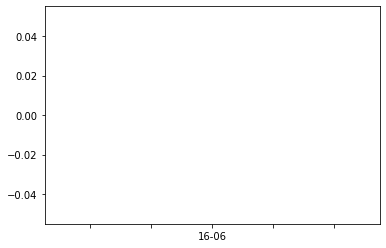

In [525]:
tweetsNormalizados = getCity(cityAnalyzed)

#normaliza dados
tweetsNormalizados=(tweetsNormalizados-tweetsNormalizados.min())/(tweetsNormalizados.max()-tweetsNormalizados.min())

tweetsNormalizados.plot(kind="line")
plt.show()

In [526]:
def groupCovid(df, start, end):
    #agrupa casos por semana
    df = df.sort_values(by="Data")
    df = df[(df['Data'] >= start) & (df['Data'] <= end)]
    
    groupedByWeek = df.groupby(df['Data'].dt.strftime('%W'))['casos']
    
    return groupedByWeek.sum()

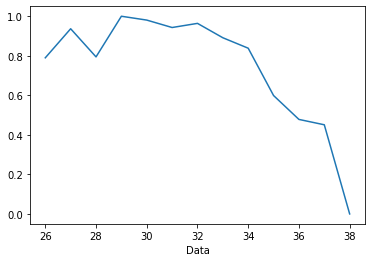

In [527]:
covidDataByWeek = groupCovid(df, "2020-06-30", "2020-09-21")

#normaliza dados
covidDataByWeek=(covidDataByWeek-covidDataByWeek.min())/(covidDataByWeek.max()-covidDataByWeek.min())

covidDataByWeek.plot(kind="line")
plt.show()

In [528]:
dfTweets = pd.DataFrame({'data':tweetsNormalizados.index, 'tweets na semana':tweetsNormalizados.values})
dfTweets["id"] = dfTweets.index + weeksAfter #compara com casos X semanas seguintes

dfCasos = pd.DataFrame({'semana':covidDataByWeek.index, 'casos de covid na semana':covidDataByWeek.values})
dfCasos["id"] = dfCasos.index
dfCasos

,semana,casos de covid na semana,id
0,26,0.789749,0
1,27,0.936715,1
2,28,0.794369,2
3,29,1.000000,3
4,30,0.980561,4
5,31,0.942992,5
6,32,0.963912,6
7,33,0.891213,7
8,34,0.838302,8
9,35,0.598937,9


In [529]:
dadosAgrupados = pd.concat([dfTweets])
dadosAgrupados = pd.merge(dadosAgrupados, dfCasos, on='id')
dadosAgrupados = dadosAgrupados[['data', 'semana', 'tweets na semana', 'casos de covid na semana']]
dadosAgrupados

,data,semana,tweets na semana,casos de covid na semana
0,16-06,26,NaN,0.789749
1,22-06,27,NaN,0.936715
2,29-06,28,NaN,0.794369
3,06-07,29,NaN,1.000000
4,13-07,30,NaN,0.980561
5,20-07,31,NaN,0.942992
6,10-08,32,NaN,0.963912
7,18-08,33,NaN,0.891213
8,24-08,34,NaN,0.838302
9,01-09,35,NaN,0.598937


In [530]:
dadosAgrupados.corr()

,tweets na semana,casos de covid na semana
tweets na semana,NaN,NaN
casos de covid na semana,NaN,1.0


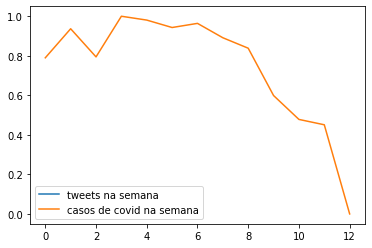

In [531]:
dadosAgrupados.plot(kind="line")
plt.show()